<a href="https://colab.research.google.com/github/HerraKaava/tensorflow/blob/main/NN-Regression/NN_Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

In [66]:
print(tf.__version__)

2.15.0


In [67]:
# Read in the insurance dataset
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [68]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* **charges** is the *output* variable, which describes "individual medical costs billed by health insurance".

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [70]:
df.shape

(1338, 7)

Keep in mind that the data fed to *neural networks* should be numerical. We need to perform some feature engineering to the columns that have type *object*.

In [71]:
# Use map() function to map the categorical values into numerical values
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

In [72]:
# Use get_dummies() method to make 3 dummy variables
# from the region variable, which has 4 categories
# (k-1 categories to avoid the dummy variable trap)
region_dummies = pd.get_dummies(df['region'], drop_first=True, dtype=int)

In [73]:
# Drop the original region column and add the dummy columns to df
df = df.drop('region', axis=1)
df['northwest'] = region_dummies['northwest']
df['southeast'] = region_dummies['southeast']
df['southwest'] = region_dummies['southwest']

In [74]:
df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0


In [75]:
df.shape

(1338, 9)

In [76]:
# Features and labels
X = df.drop('charges', axis=1)
y = df['charges']

In [77]:
print(X.shape)
print(y.shape)

(1338, 8)
(1338,)


In [157]:
# Training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to tensors
X_train = tf.cast(X_train, dtype=tf.float32)
X_val = tf.cast(X_val, dtype=tf.float32)
y_train = tf.cast(y_train, dtype=tf.float32)
y_val = tf.cast(y_val, dtype=tf.float32)

In [158]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')

X_train shape: (1070, 8)
y_train shape: (1070,)
X_val shape: (268, 8)
y_val shape: (268,)


In [152]:
tf.random.set_seed(42)

# Create a model
model1 = tf.keras.Sequential(name='model1')

# Add an input layer
model1.add(tf.keras.Input(shape=(8,), name='input_layer'))

# Add one hidden layer with 10 neurons
model1.add(tf.keras.layers.Dense(units=10, activation='linear', name='hidden_layer1'))

# Add an output layer
model1.add(tf.keras.layers.Dense(units=1, activation='linear', name='output_layer'))

# Compile the model
model1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])

* Note that now when we have 8 explanatory variables, the input shape will be (8,).
* This is because we are predicting the $\, ith \,$ label $\, \hat{y}_i \,$ using 8 feature values.
* Note that in the context of a **Dense** layer in a neural network, the term "units" refers to the number of neurons in that layer. For example, if we specify $\, units=10, \,$ it means that the layer will have 10 neurons.
* Note that in a *Neural Network Regression* where we are predicting a single numerical output, the output layer should contain only one neuron.
* This single neuron will produce the continuous value that we are trying to predict.

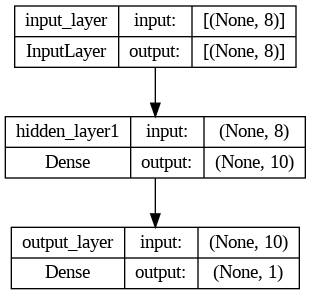

In [125]:
# Visualize the layers of the model
plot_model(model1, show_shapes=True)

In [127]:
model1.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 10)                90        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [146]:
# Fit the model
model1.fit(X_train, y_train, epochs=100, verbose=0)

In [147]:
# Evaluate the model
print(f'training loss: {model1.evaluate(X_train, y_train)}')
print(f'validation loss: {model1.evaluate(X_val, y_val)}')

34/34 [==============================] - 0s 2ms/step - loss: 7674.9185 - mae: 7674.9185
training loss: [7674.91845703125, 7674.91845703125]
9/9 [==============================] - 0s 2ms/step - loss: 7558.3154 - mae: 7558.3154
validation loss: [7558.3154296875, 7558.3154296875]


In [148]:
def MAE(y_val, y_pred):
    error = 0
    for i in range(len(y_val)):
        error += abs(y_val[i] - y_pred[i])
    return error / len(y_val)

In [149]:
# Make predictions
model1_y_pred = model1.predict(X_val)

# Evaluate the model
MAE(y_val, model1_y_pred)

9/9 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(1,), dtype=float32, numpy=array([7558.314], dtype=float32)>

In [150]:
# Visualize the predictions
def plot_preds(y_val, y_pred):
    plt.figure(figsize=(8,6), dpi=100)
    # Plot the ideal line y=x
    plt.plot([min(y_val), max(y_val)],
             [min(y_val), max(y_val)],
             'r--',
             label='ideal line')
    # Plot true labels vs predictions
    plt.scatter(y_pred, y_val, c='black', label='true vs pred')

    plt.xlabel('y_pred')
    plt.ylabel('y_true')
    plt.grid(True)
    plt.legend();

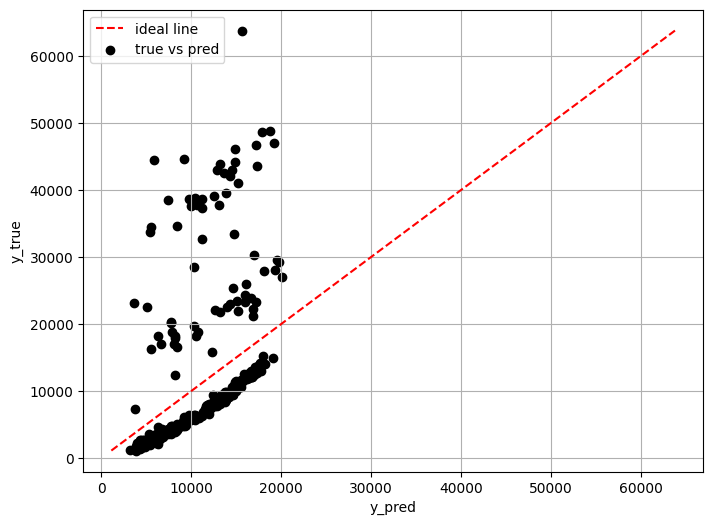

In [184]:
plot_preds(y_val, model1_y_pred)

* A shitty model. Let's try to improve it.

<br>

<h3>Improving the model</h3>

In [180]:
# Add another hidden layer and use Adam instead of SGD.
tf.random.set_seed(42)
model2 = tf.keras.Sequential(name='model2')
model2.add(tf.keras.Input(shape=(8,), name='input_layer'))
model2.add(tf.keras.layers.Dense(units=10, activation='linear', name='hidden_layer_1'))
model2.add(tf.keras.layers.Dense(units=10, activation='linear', name='hidden_layer_2'))
model2.add(tf.keras.layers.Dense(units=1, activation='linear', name='output_layer'))
model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['mae'])
model2.fit(X_train, y_train, epochs=100, verbose=0)

* Note that if the learning rate of the optimizer is too *high*, the loss can diverge to infinity, and in this case the output of the evaluation will be **nan**.

In [181]:
# Evaluate the model
print(f'training loss: {model2.evaluate(X_train, y_train)}')
print(f'validation loss: {model2.evaluate(X_val, y_val)}')

34/34 [==============================] - 0s 2ms/step - loss: 3481.1250 - mae: 3481.1250
training loss: [3481.125, 3481.125]
9/9 [==============================] - 0s 3ms/step - loss: 3176.0710 - mae: 3176.0710
validation loss: [3176.071044921875, 3176.071044921875]


9/9 [==============================] - 0s 2ms/step


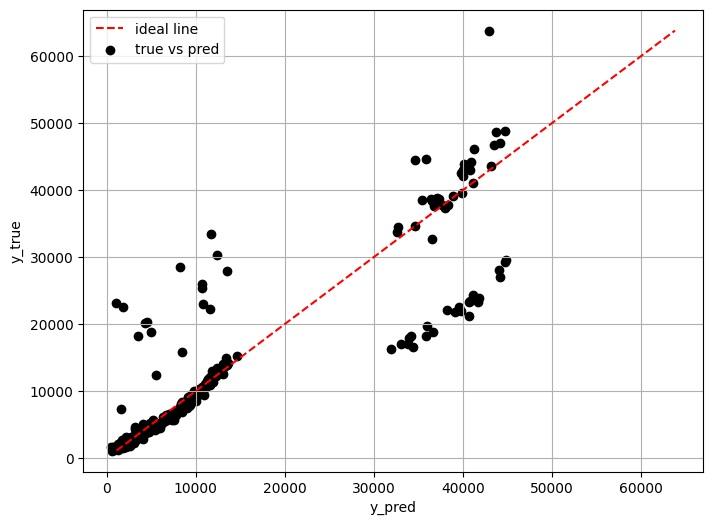

In [182]:
# Visualize the true labels vs. predicted labels
plot_preds(y_val, model2.predict(X_val))